In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
LTCnov_df = pd.read_csv('../../Resources/LTC/LTC-USD_Historical_Nov-2021.csv',index_col='Date', parse_dates= True)
LTCnov_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,7.982310,11.890900,7.982310,10.727500,10.727500,5.217485e+08
2017-02-01,10.741300,16.059401,10.551900,15.817200,15.817200,4.671668e+08
2017-03-01,15.847200,55.114700,15.558900,50.037300,50.037300,4.324810e+09
2017-04-01,50.033699,79.021202,40.901100,79.021202,79.021202,3.154320e+09
2017-05-01,79.321602,236.964996,73.086601,230.669006,230.669006,1.467995e+10


In [3]:
LTCnov_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
LTCnov_df = LTCnov_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
LTCnov_df.head(10)

,Close
Date,
2017-01-01,10.727500
2017-02-01,15.817200
2017-03-01,50.037300
2017-04-01,79.021202
2017-05-01,230.669006
2017-06-01,294.915985
2017-07-01,203.871002
2017-08-01,383.041992
2017-09-01,301.464996


In [6]:
LTCnov_df.dtypes

Close    float64
dtype: object

In [7]:
#help(seasonal_decompose)

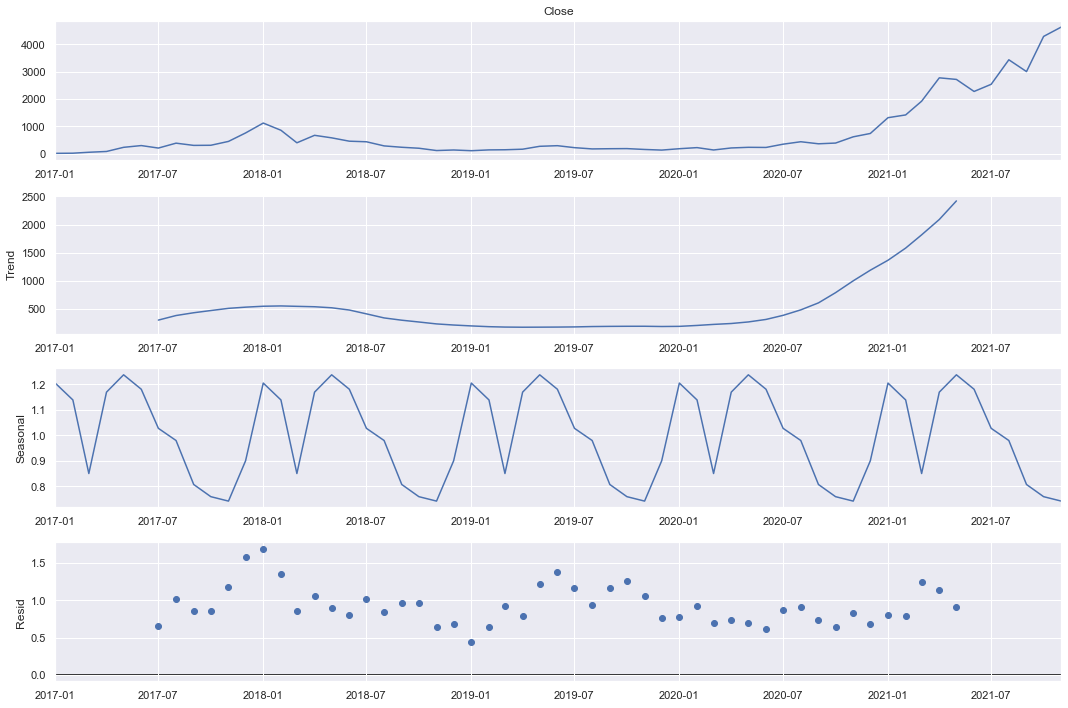

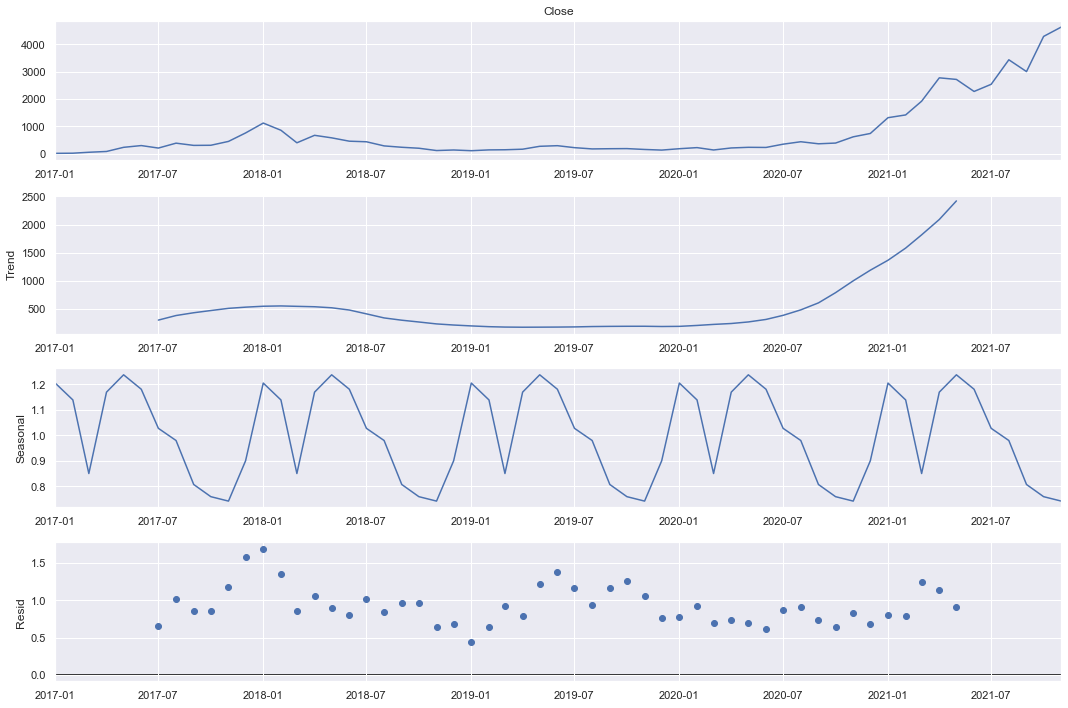

In [8]:
results = seasonal_decompose(LTCnov_df['Close'],model ='multiplicative',period=12)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [24]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to LTC dataset
stepwise_fit = auto_arima(LTCnov_df['Close'], start_p = 0, start_q = 0,
max_p = 4, max_q = 4, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=558.849, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=493.936, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=562.220, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=496.679, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=489.989, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=539.034, Time=0.18 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=491.926, Time=0.35 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=491.943, Time=0.34 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=515.793, Time=0.28 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=492.953, Time=0.42 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=490.00

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -239.995
Date:                            Mon, 13 Dec 2021   AIC                            489.989
Time:                                    00:26:47   BIC                            499.240
Sample:                                         0   HQIC                           493.470
                                             - 59                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0647      8.314      1.090      0.276      -7.230      25.360
ar.L1          0.8559      0.089      9.582      0.000       0.681       1.031
ar.S.L12      -0.6431      0.158     -4.069      0.000      -0.953      -0.333
ar.S.L24      -0.4735      0.147     -3.226      0.001      -0.761      -0.186
sigma2      1299.6499    298.891      4.348      0.000     713.834    1885.466
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.98
Prob(Q):                              0.90   Prob(JB):                         0.23
Heteroskedasticity (H):               0.67   Skew:                            -0.40
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Split data into train / test sets
train = LTCnov_df.iloc[:len(LTCnov_df)-12]
test = LTCnov_df.iloc[len(LTCnov_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 2, 2)x(0, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (1, 0, 0),
seasonal_order =(0, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                   47
Model:             SARIMAX(0, 2, 2)x(0, 1, [], 12)   Log Likelihood                -175.420
Date:                             Mon, 13 Dec 2021   AIC                            356.841
Time:                                     00:20:35   BIC                            361.330
Sample:                                 01-01-2017   HQIC                           358.352
                                      - 11-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0265      0.171     -6.008      0.000      -1.361      -0.692
ma.L2          0.1117      0.197      0.567      0.571      -0.274       0.498
sigma2      2288.2772    484.893      4.719      0.000    1337.905    3238.650
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.85   Prob(JB):                         0.37
Heteroskedasticity (H):               0.27   Skew:                            -0.07
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

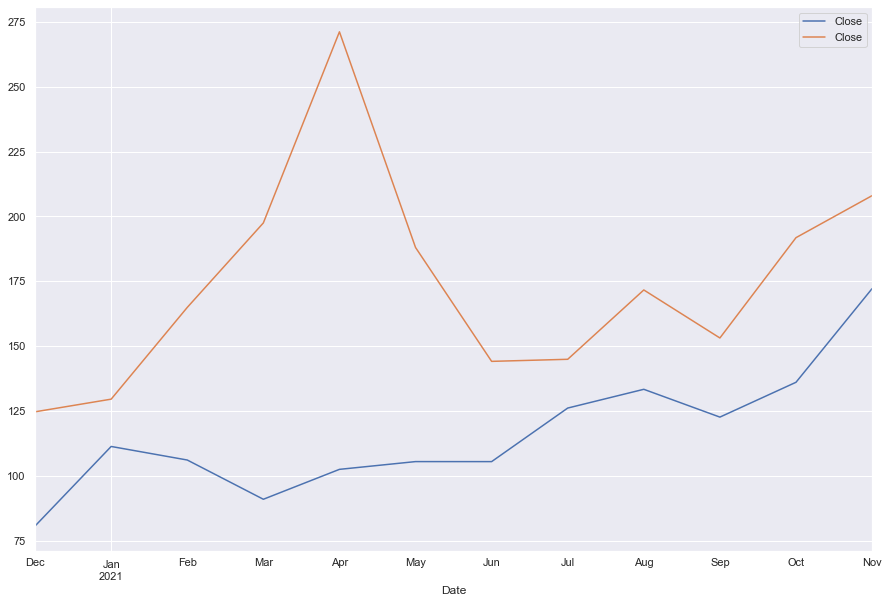

In [19]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [20]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

71.27901126463327

In [21]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

5080.697446863717

Text(0, 0.5, 'Closing Amount (USD)')

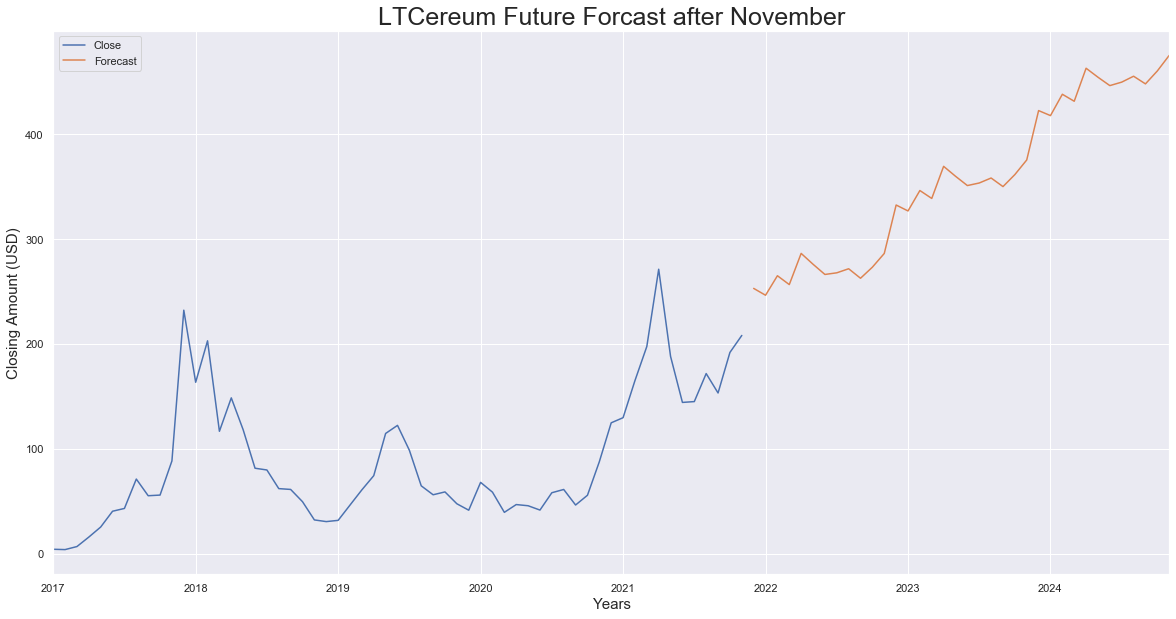

In [22]:
# Train the model on the full dataset
model = model = SARIMAX(LTCnov_df['Close'],order = (0, 2, 2),seasonal_order =(0, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(LTCnov_df),end = (len(LTCnov_df)-1) + 3 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
LTCnov_df['Close'].plot(figsize = (20, 10), legend = True)
forecast.plot(legend = True)
plt.title("LTCereum Future Forcast after November", fontsize = 25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Closing Amount (USD)',fontsize=15)